#***EDA***

In [76]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Microbiome**

In [78]:
df = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/microbiome.csv', encoding='latin1')
df.head()

,host_ID,ASV_1,ASV_10,ASV_100,ASV_1001,ASV_1002,ASV_1004,ASV_1005,ASV_1007,ASV_1008,...,ASV_982,ASV_983,ASV_985,ASV_986,ASV_987,ASV_988,ASV_990,ASV_992,ASV_994,ASV_997
0,2010,0.090395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011,0.075280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014,0.031537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015,0.254525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,0.176341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
#Check that each row sums to 1
row_sums = df.iloc[:, 1:].sum(axis=1)
print(f'Row sums: {row_sums}')
print(f'All rows sum to 1: {row_sums.all()}')

Row sums: 0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
864    1.0
865    1.0
866    1.0
867    1.0
868    1.0
Length: 869, dtype: float64
All rows sum to 1: True


This plot describes the mean percentage of the presence of each microbiome in hosts  - the top 5

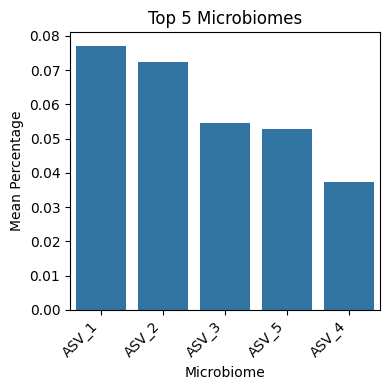

In [80]:
# Get the top 5 microbiomes by mean percentage across hosts
top_microbiomes = df.iloc[:, 1:].mean().sort_values(ascending=False).head(5)
# Plot a bar plot for the top 5 microbiomes
plt.figure(figsize=(4, 4))
sns.barplot(x=top_microbiomes.index, y=top_microbiomes.values)
plt.title('Top 5 Microbiomes')
plt.xlabel('Microbiome')
plt.ylabel('Mean Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can observe that the five microbiomes that make up a high percentage of all the microbiomes found in the host are:<br> AVS_1, AVS_2, AVS_3, AVS_5 and AVS_4

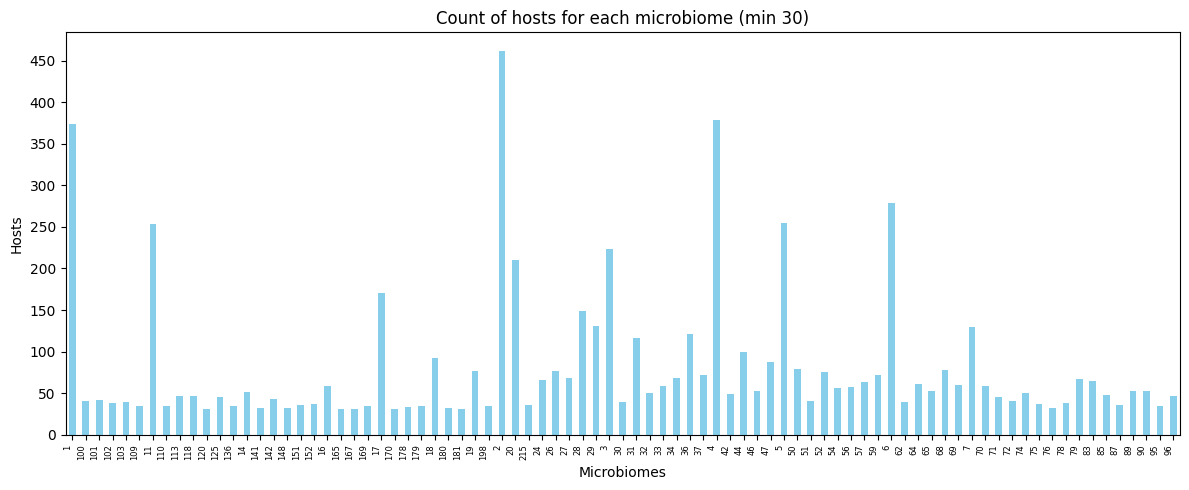

In [81]:
hosts_count = df.iloc[:, 1:].gt(0).sum()

# Plotting
plt.figure(figsize=(12, 5))

#filter the microbiomes
filter_hosts = hosts_count[hosts_count > 30]
new_xtick_labels = [x.split('_')[-1] for x in filter_hosts.index]

filter_hosts.plot(kind='bar', color='skyblue')

plt.title('Count of hosts for each microbiome (min 30)')
plt.xlabel('Microbiomes')
plt.ylabel('Hosts')
plt.yticks(range(0, max(filter_hosts)+1, 50))
plt.xticks(range(len(filter_hosts)), new_xtick_labels, fontsize=6, rotation=90, ha='right')
plt.tight_layout()

plt.show()

According to the graph we can observe that AVS_2 microbiome is the most common among the hosts, followed by AVS_4 microbiome and then AVS_1 and so on

**histogram**

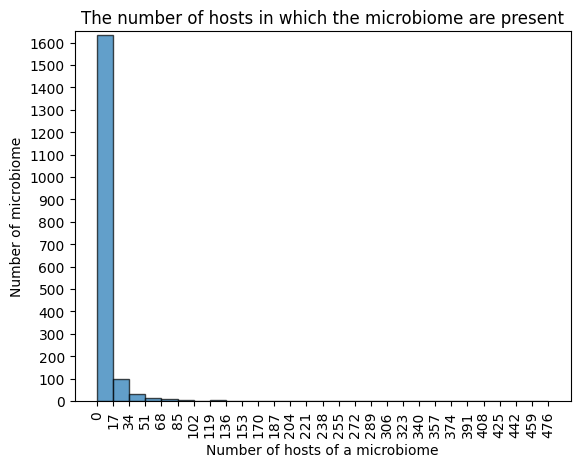

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the table where each column represents OTU IDs and each row represents Host IDs
data = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/microbiome.csv', encoding='latin1')

# Count the number of cells in each column meeting the condition
cells_condition = (data > 0) & (data <= 1)
cells_count = cells_condition.sum()

# Count how many columns have the same number of cells meeting the condition
columns_count = cells_count.value_counts().sort_index()

# Calculate the total number of host IDs
total_host_ids = len(data.index)

# Define the bins for the histogram (each bin representing 10% of the total host IDs)
bin_size = int(total_host_ids * 0.02)

# Define the bins for the histogram
bins = range(0, cells_count.max() + bin_size - 1, bin_size)

# Plot the bar histogram with bins representing the range of host IDs
plt.hist(cells_count, bins=bins, edgecolor='black', alpha=0.7)

# Customize the tick marks on the x-axis
plt.xticks(bins, rotation='vertical', ha='center')  # Adjust rotation and alignment

# Customize the tick marks on the y-axis and set the range up to 1650
plt.yticks(range(0, 1700, 100))  # Adjust the range up to 1650

# Set the limit of the Y-axis up to 1650
plt.ylim(0, 1650)

# Add labels and title
plt.xlabel('Number of hosts of a microbiome')
plt.ylabel('Number of microbiome')
plt.title('The number of hosts in which the microbiome are present')

# Show the plot
plt.show()


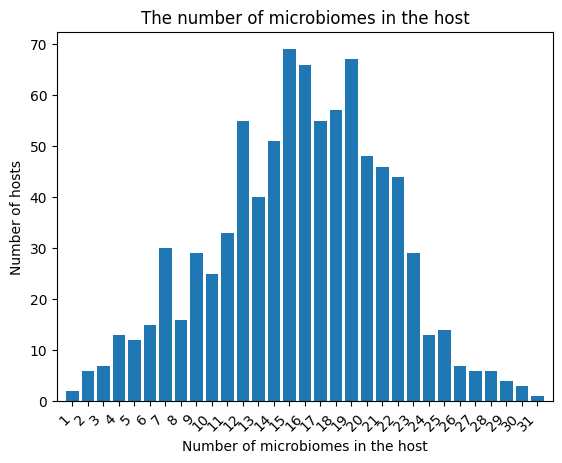

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the table where each column represents OTU IDs and each row represents Host IDs
data = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/microbiome.csv', encoding='latin1')

# Count the number of cells in each row meeting the condition
cells_condition = (data > 0) & (data <= 1)
cells_count = cells_condition.sum(axis=1)

# Count how many rows have the same number of cells meeting the condition
rows_count = cells_count.value_counts().sort_index()

# Plot the bar histogram with bins representing the range of cells meeting the condition
plt.bar(rows_count.index, rows_count.values)

# Customize the tick marks on the x-axis with diagonal rotation
plt.xticks(rows_count.index, rotation=45, ha='right')

# Set the limit of the x-axis to make it longer
plt.xlim(min(rows_count.index) - 1, max(rows_count.index) + 1)

# Add labels and title
plt.xlabel('Number of microbiomes in the host')
plt.ylabel('Number of hosts')
plt.title('The number of microbiomes in the host')

# Show the plot
plt.show()


# **host_metadata**

In [84]:
df = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/host_metadata.csv', encoding='latin1')
df = df.drop(columns=['museum_number','animal_id','final_identification', 'field_identification',  'mammae_condition', 'mammae_number_ax', 'mammae_number_ab',
       'mammae_number_ing', 'embryos_r', 'age_repro', 'age_dental', 'habitat_description', 'testicle_length', 'testicle_width', 'testicle_position','pitfall_position', 'tl', 'tv', 'hf', 'ear', 'notes', 'dist_village_center', 'vagina', 'embryos_l', 'embryos_l', 'embryos_cr', 'placental_scars_l', 'placental_scars_r'])
df.head()

,host_ID,day,month,year,season,preparation,locality,village,grid_name,grid_number,habitat_type,trap_type,trap_number,latitude,longitude,elevation.obs,sex,mass,hb,epididym
0,2010,2,10,2019,1,"skull, tail","Madagascar, Région SAVA, District Sambava, Com...",Mandena,Savoka,1,brushy_regrowth,Sherman,1,-14.466052,49.799352,144.218796,female,80.0,153,NaN
1,2011,2,10,2019,1,"skull, tail","Madagascar, Région SAVA, District Sambava, Com...",Mandena,Savoka,1,brushy_regrowth,Sherman,15,-14.466166,49.798864,145.284958,male,51.0,134,not con.
2,2013,2,10,2019,1,"skull, tail","Madagascar, Région SAVA, District Sambava, Com...",Mandena,Savoka,1,brushy_regrowth,Sherman,65,-14.465687,49.799079,118.188316,female,88.0,157,NaN
3,2014,2,10,2019,1,"skull, tail","Madagascar, Région SAVA, District Sambava, Com...",Mandena,Savoka,1,brushy_regrowth,Sherman,90,-14.465359,49.799012,133.551437,male,77.0,148,not con.
4,2015,2,10,2019,1,"skull, tail","Madagascar, Région SAVA, District Sambava, Com...",Mandena,Savoka,1,brushy_regrowth,Sherman,105,-14.465503,49.798734,145.232788,female,65.0,134,NaN


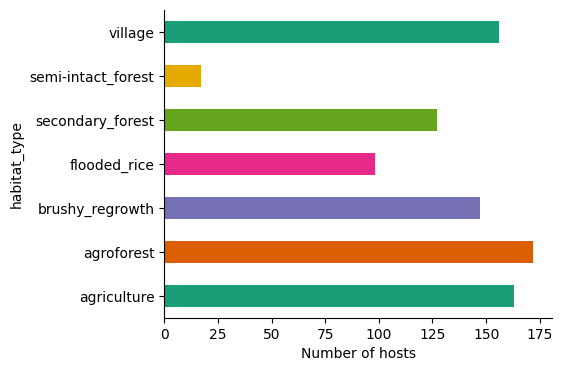

In [85]:
# @title Hosts count for each habitat type
plt.figure(figsize=(5, 4))
df.groupby('habitat_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.xlabel('Number of hosts')
plt.gca().spines[['top', 'right',]].set_visible(False)

In the exploratory data analysis, the distribution of hosts across various habitat types reveals notable differences in abundance.<br>
Agriculture and agroforest habitats exhibit the highest counts with ~160 and ~170 hosts respectively, indicating their significance in hosting diverse populations.<br> Conversely, semi-intact forest stands out with the lowest count at ~20 hosts, suggesting its comparatively limited suitability for hosting microbiomes or its conservation status restricting host populations within this habitat.<br>
These findings underscore the importance of habitat type in shaping host populations and potentially influencing microbiome transmission dynamics within ecosystems.

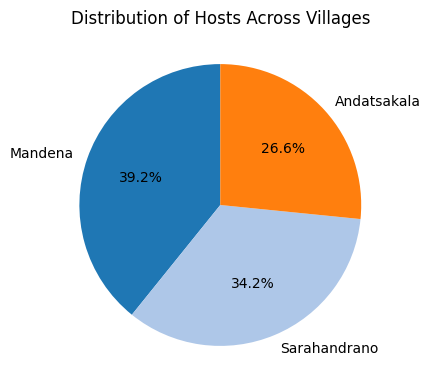

In [86]:
# @title Village
hosts_per_village = df['village'].value_counts()
colors = plt.cm.tab20.colors[:len(hosts_per_village)]

plt.figure(figsize=(4, 4))
plt.pie(hosts_per_village, labels=hosts_per_village.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Hosts Across Villages', pad=20)
plt.axis('equal')

plt.show()

In [87]:
hosts_per_village = df['village'].value_counts()
for village, count in hosts_per_village.items():
    print(f"{village}: {count}")

Mandena: 345
Sarahandrano: 301
Andatsakala: 234


The differences in host distribution across Mandena, Sarahandrano, and Andatsakala appear relatively close, with Mandena having a slightly higher proportion of hosts compared to the other two villages.<br>While the differences may not be dramatic, they still indicate varying host populations across the villages,<br> which could be influenced by ecological, social, or geographic factors.

###Temporal trends


per year:

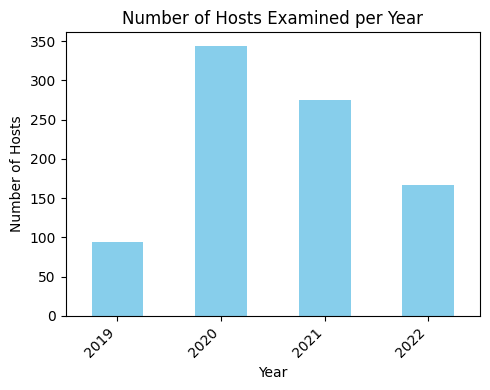

In [88]:
# Group the data by year and count the number of hosts examined each year
hosts_per_year = df.groupby('year')['host_ID'].count()

# Plot
plt.figure(figsize=(5, 4))
hosts_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Hosts Examined per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [89]:
hosts_per_year = df['year'].value_counts()
for year, count in hosts_per_year.items():
    print(f"{year}: {count}")

2020: 344
2021: 275
2022: 167
2019: 94


The bar chart depicts the number of hosts examined each year, revealing a notable fluctuation in examination counts over time. <br>The year 2020 stands out with the highest examination count at 344 hosts, followed by 2021 with 275 hosts. <br>Conversely, the examination counts for 2019 and 2022 are notably lower, at 94 and 167 hosts respectively.<br> This variation suggests potential shifts in research focus, sampling efforts, or data collection methodologies across different years

In [90]:
#check months for each season
for season_value in sorted(df['season'].unique()):
    season_df = df[df['season'] == season_value]
    print(f"Season {season_value}: {sorted(season_df['month'].unique())}")


Season 1: [10, 11, 12]
Season 2: [3, 4, 5]
Season 3: [6, 7, 8, 9]


per season:

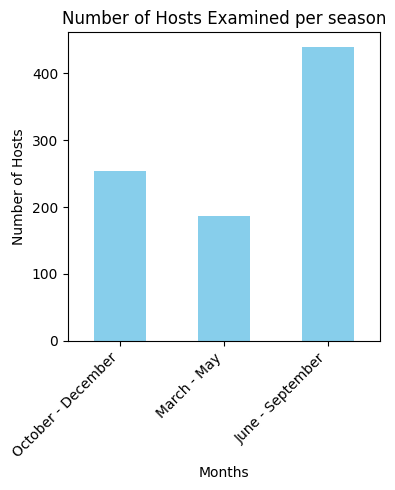

In [91]:
season_labels = {
    1: 'October - December',
    2: 'March - May',
    3: 'June - September'
}
df['season_label'] = df['season'].map(season_labels)
hosts_per_season = df['season_label'].value_counts()
ordered_months = ['October - December', 'March - May', 'June - September']

# Plot
plt.figure(figsize=(4, 5))
hosts_per_season[ordered_months].plot(kind='bar', color='skyblue')
plt.title('Number of Hosts Examined per season')
plt.xlabel('Months')
plt.ylabel('Number of Hosts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of host examinations across different seasons.<br>June to September emerges as the period with the highest number of host examinations.<br>
This distribution suggests seasonal variations in sampling efforts or ecological factors influencing host populations, highlighting the importance of considering seasonal dynamics in understanding disease ecology and transmission patterns.

# **Pathogens**

In [92]:
df = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/pathogen.csv', encoding='latin1')
df.head()

,host_ID,OTU_ID_1,OTU_ID_2,OTU_ID_3,OTU_ID_4,OTU_ID_5,OTU_ID_6,OTU_ID_7,OTU_ID_8,OTU_ID_9,...,OTU_ID_105,OTU_ID_106,OTU_ID_107,OTU_ID_108,OTU_ID_109,OTU_ID_110,OTU_ID_111,OTU_ID_112,OTU_ID_113,OTU_ID_114
0,2010,0.0,0.907808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,2011,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,2013,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,2014,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,2015,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [93]:
#Check that each row sums to 1
row_sums = df.iloc[:, 1:].sum(axis=1)
print(f'Row sums: {row_sums}')
print(f'All rows sum to 1: {row_sums.all()}')

Row sums: 0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
749    1.0
750    1.0
751    1.0
752    1.0
753    1.0
Length: 754, dtype: float64
All rows sum to 1: True


This plot describes the mean percentage of the presence of each pathogen in hosts  - the top 5

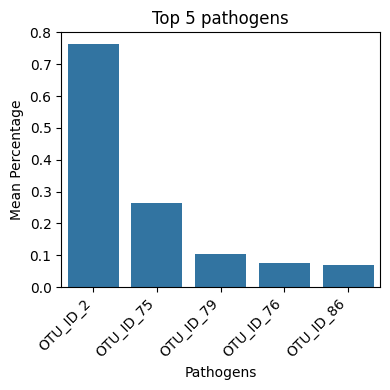

In [94]:
# Get the top 5 pathogens by mean percentage across hosts
top_pathogens = df.iloc[:, 1:].mean().sort_values(ascending=False).head(5)
# Plot a bar plot for the top 5 pathogens
plt.figure(figsize=(4, 4))
sns.barplot(x=top_pathogens.index, y=top_pathogens.values)
plt.title('Top 5 pathogens')
plt.xlabel('Pathogens')
plt.ylabel('Mean Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 We observed the top 5 pathogens by mean percentage across hosts.<br>OTU_ID_2 emerges as the most prevalent pathogen, constituting 75% on average.

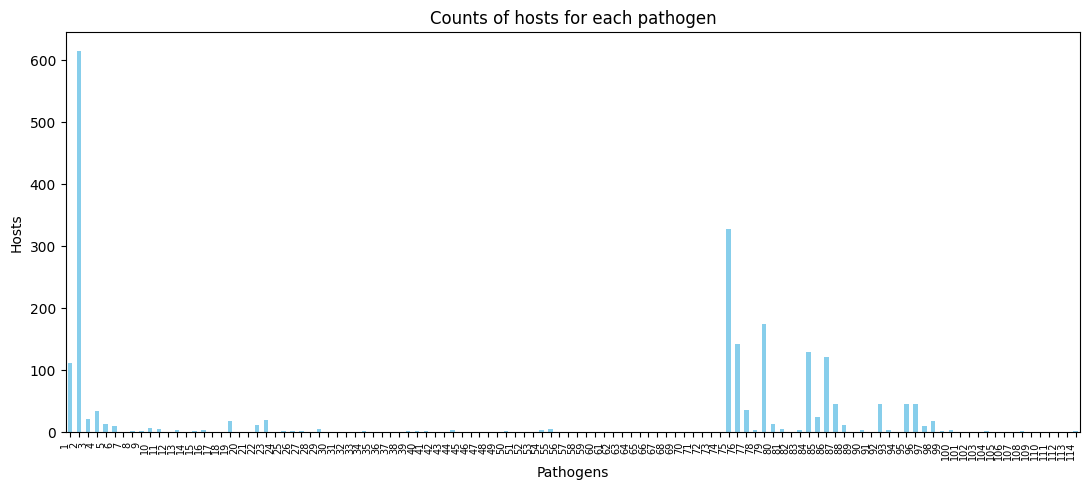

In [95]:
hosts_count = df.iloc[:, 1:].gt(0).sum()

plt.figure(figsize=(11, 5))

hosts_count.plot(kind='bar', color='skyblue')
new_xtick_labels = [x.split('_')[-1] for x in hosts_count.index]

plt.title('Counts of hosts for each pathogen')
plt.xlabel('Pathogens')
plt.ylabel('Hosts')
plt.xticks(range(len(hosts_count)), new_xtick_labels, rotation=90, ha='right', fontsize=7)
plt.tight_layout()

plt.show()

In order to minimize noise and enhance clarity, we selectively filtered pathogens on the graph,<br>retaining only those with a count of hosts exceeding 10.<br>
This adjustment allows for a more focused analysis of notable changes between the different pathogens.

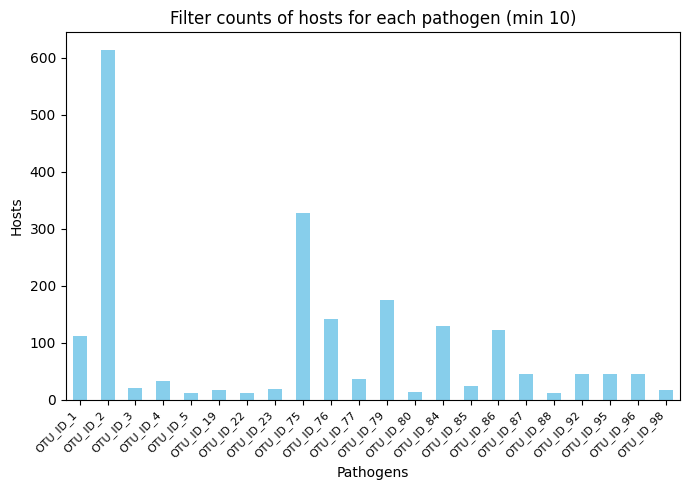

In [96]:
hosts_count = df.iloc[:, 1:].gt(0).sum()

# Plotting
plt.figure(figsize=(7, 5))

filter_hosts = hosts_count[hosts_count > 10]
filter_hosts.plot(kind='bar', color='skyblue')

plt.title('Filter counts of hosts for each pathogen (min 10)')
plt.xlabel('Pathogens')
plt.ylabel('Hosts')
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.tight_layout()

plt.show()


In this plot, we can now observe the variations between the pathogens clearly.
<br>The graph illustrates the 22 pathogens with the highest frequency among hosts.
<br>Pathogen number 2 stands out with the highest examination count- exceeding 600 hosts.

**Histogram**

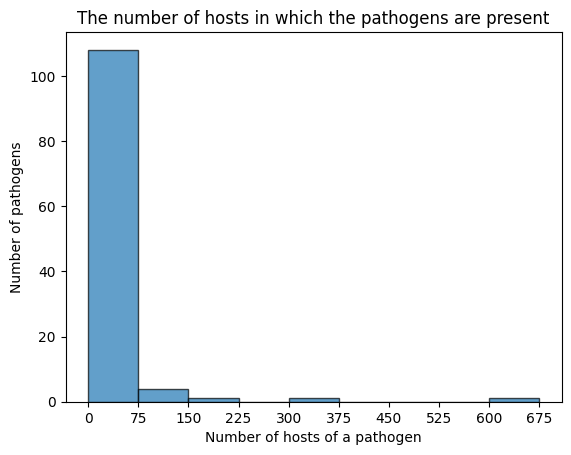

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the table where each column represents OTU IDs and each row represents Host IDs
data = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/pathogen.csv', encoding='latin1')

# Count the number of cells in each column meeting the condition
cells_condition = (data > 0) & (data <= 1)
cells_count = cells_condition.sum()

# Count how many columns have the same number of cells meeting the condition
columns_count = cells_count.value_counts().sort_index()

# Calculate the total number of host IDs
total_host_ids = len(data.index)


# Define the bins for the histogram (each bin representing 10% of the total host IDs)
bin_size = int(total_host_ids * 0.1)

# Define the bins for the histogram
bins = range(0, cells_count.max() + bin_size - 1, bin_size)

# Plot the bar histogram with bins representing the range of host IDs
plt.hist(cells_count, bins=bins, edgecolor='black', alpha=0.7)

# Customize the tick marks on the x-axis
plt.xticks(bins)

# Add labels and title
plt.xlabel('Number of hosts of a pathogen')
plt.ylabel('Number of pathogens')
plt.title('The number of hosts in which the pathogens are present')

# Show the plot
plt.show()

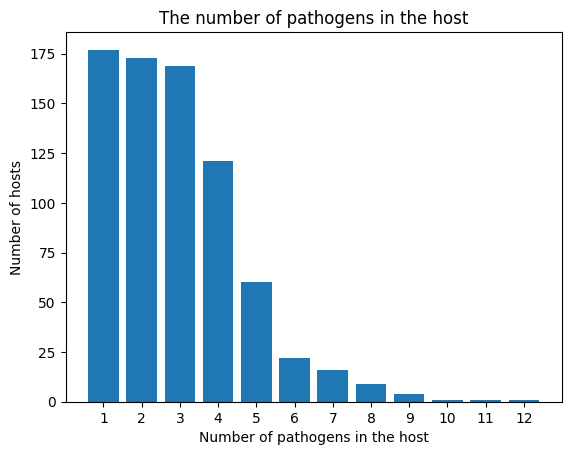

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the table where each column represents OTU IDs and each row represents Host IDs
data = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/pathogen.csv', encoding='latin1')

# Count the number of cells in each row meeting the condition
cells_condition = (data > 0) & (data <= 1)
cells_count = cells_condition.sum(axis=1)

# Count how many rows have the same number of cells meeting the condition
rows_count = cells_count.value_counts().sort_index()

# Plot the bar histogram with bins representing the range of cells meeting the condition
plt.bar(rows_count.index, rows_count.values)

# Customize the tick marks on the x-axis
plt.xticks(rows_count.index)

# Add labels and title
plt.xlabel('Number of pathogens in the host')
plt.ylabel('Number of hosts')
plt.title('The number of pathogens in the host')

# Show the plot
plt.show()

# **Pathogen_metadata**

In [99]:
df = pd.read_csv('/content/drive/MyDrive/LinkPredictionProject/Data/pathogen_metadata.csv', encoding='latin1')
df.head()

,OTU_ID,pathogen_type,otu_Order,otu_Family,otu_Genus
0,89,Protozoa,Incertae_Sedis,Blastocystis,Blastocystis_sp._subtype_3
1,97,Protozoa,Apicomplexa,Eimeriorina,Eimeria
2,76,Protozoa,Parabasalia,Tritrichomonadea,Tritrichomonas
3,79,Protozoa,Parabasalia,Tritrichomonadea,Tritrichomonas
4,84,Protozoa,Parabasalia,Hypotrichomonadea,Hypotrichomonas


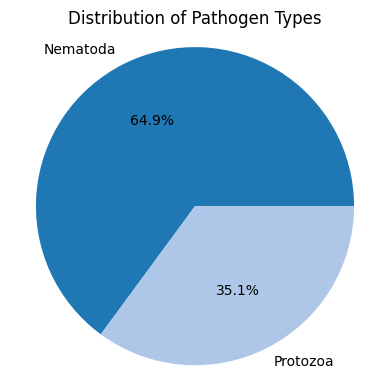

In [100]:
pathogen_counts = df['pathogen_type'].value_counts()
pathogen_counts = pathogen_counts.astype(int)

plt.figure(figsize=(4, 4))
plt.pie(pathogen_counts, labels=pathogen_counts.index, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
plt.title('Distribution of Pathogen Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


The pie chart reveals a notable predominance of Nematoda, comprising 64.9% of the pathogen types,<br>while Protozoa accounts for 35.1%.<br>
This distribution sheds light on the ecological dynamics within the studied ecosystem, indicating a higher prevalence of nematode-related infections compared to protozoan pathogens.

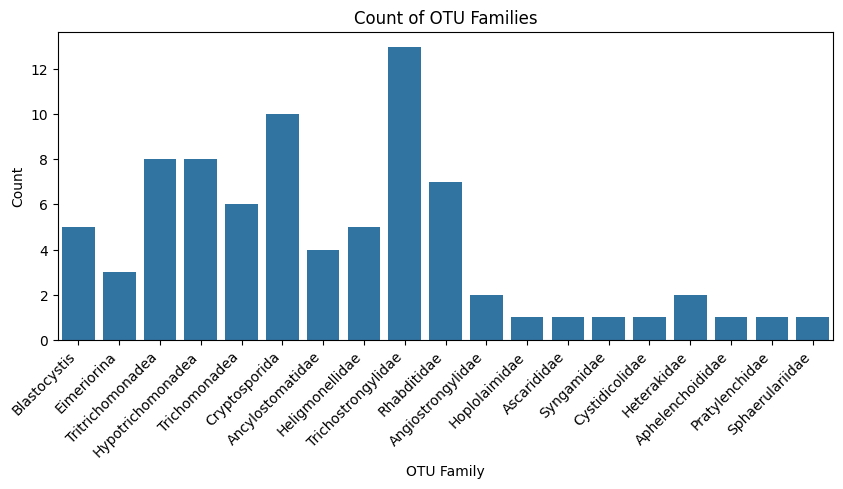

In [101]:
plt.figure(figsize=(10, 4))
sns.countplot(x='otu_Family', data=df)
plt.title('Count of OTU Families')
plt.xlabel('OTU Family')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Comparing with the next analysis of genera, families such as Hypotrichomonadea and Trichostrongylidae<br>exhibit substantial representation, indicating their significance across different taxonomic levels within the dataset<br>and potentially pointing towards their ecological importance or host associations.

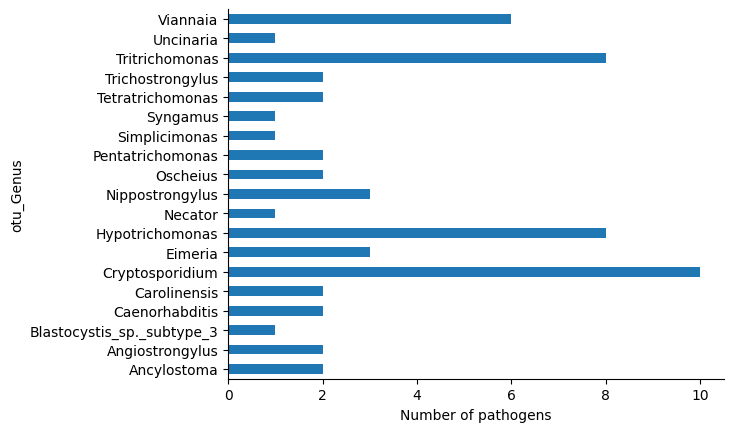

In [102]:
df.groupby('otu_Genus').size().plot(kind='barh')
plt.xlabel('Number of pathogens')
plt.gca().spines[['top', 'right',]].set_visible(False)

These findings suggest varying levels of prevalence and distribution among the identified genera.<br>
Hypotrichomonas emerges as the most prevalent genus with a count of 8,<br>followed by Viannaia with 5 occurrences.<br>Tritrichomonas, Nippostrongylus, and Cryptosporidium share the next highest count at 4 each.

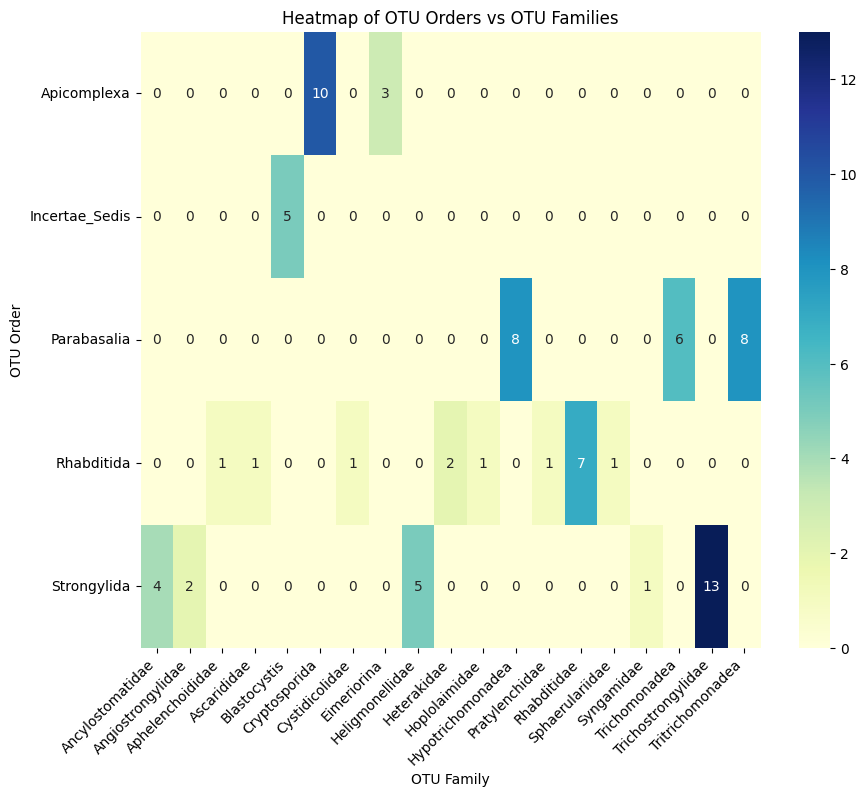

In [103]:
ct = pd.crosstab(df['otu_Order'], df['otu_Family'])
plt.figure(figsize=(10, 8))
sns.heatmap(ct, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Heatmap of OTU Orders vs OTU Families')
plt.xlabel('OTU Family')
plt.ylabel('OTU Order')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation='horizontal')
plt.show()

The heatmap visualization of OTU Orders versus OTU Families illustrates several notable associations.<br>For instance, within the Parabasalia order, Hypotrichomonadea and Trichomonadea families each account for 8 and 5 occurrences respectively, indicating a significant presence of these families within this order.<br>Similarly, the Strongylida order exhibits a prominent relationship with Trichostrongylidae, with 7 instances recorded.